In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import expon,gamma
from random import random as rand
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Metropolis ALgorithm
def metropolis(target,no_samples,proposal):

    theta = np.zeros(no_samples)
    acceptance=0
    #Setting initial theta value to 1
    theta[0]=1
    #Covariance for the jump matrix
       #cov = [[1,0],[0,5]]

    #Metropilis Algorithm
    for i in range(no_samples):
        #From the Text Book, where phi is teta_temp
        theta_temp=proposal.rvs(1)
        #From the Text Book
        r = (target.pdf(theta_temp)/target.pdf(theta[i-1]))/(proposal.pdf(theta_temp)/proposal.pdf(theta[i-1]))
        prob = min(1,r)
        u = rand()

        # Accept theta_temp with probability prob
        if(u<=prob):
            acceptance+=1
            theta[i]=theta_temp
        # Reject theta_temp with probability 1-prob
        else:
            theta[i]=theta[i-1]    
    return theta,acceptance
   

In [3]:
# The proposal distribution is exponential
# Where Lambda value is 0.3
proposal = expon(scale=1/0.3)
# The Target distribution is always a gamma distribution
target = gamma(a=3,scale=1)
# Number of Samples
no_samples=10000
thetas,acceptance= metropolis(target,no_samples,proposal)
Acceptance_probability=acceptance/no_samples
print(Acceptance_probability)

0.6406


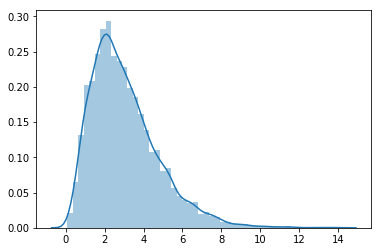

In [4]:
#Gamma Distribution of the Samples
sns.distplot(thetas)

Text(0.5,1,'Probality of acceptance vs lambdas')

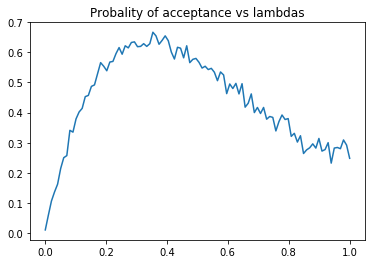

In [5]:
#Lets try to find the Best Lambda from a range of 0.001 to 1
lambdas = np.linspace(0.001,1,100)
#Same Target Distribution
target = gamma(a=3,scale=1)
#An Acceptance Array
acceptance_arr=[]
#Loop to run each lambda for 1 trial
for i in lambdas:
    acceptance_avg=[]
    proposal = expon(scale=1/i)
    thetas,acc= metropolis(target,1000,proposal)
    acceptance_avg.append(acc/1000)
    acceptance_arr.append([lambdas,np.mean(acceptance_avg)])

acceptance_arr = np.array(acceptance_arr)
plt.plot(lambdas,acceptance_arr[:,1])
plt.title("Probality of acceptance vs lambdas")

[0.25, 0.45, 0.5, 0.7]

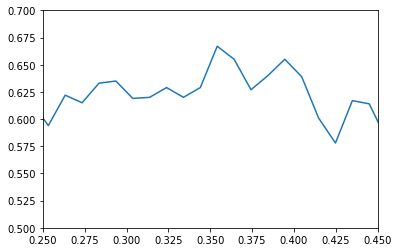

In [6]:
plt.plot(lambdas,acceptance_arr[:,1])
plt.axis([0.25,0.45,0.5,0.7])

### Conclusion:
The Best Acceptance Probability seems to be around $\lambda$= 0.35